In [105]:
from sklearn.linear_model import LinearRegression

def sigbg_eval(model, test):
    model_predictions = model.predict(test[:,:-1])
    model_predictions_binary = np.where(model_predictions > 0.5, 
                                        np.ones_like(model_predictions), 
                                        np.zeros_like(model_predictions))
    print('Accuracy: {}%'.format(
        round((len(test) - np.sum(np.abs(model_predictions_binary - test[:,-1])))/len(test),4) * 100))

def sigbg_lin_reg(train, test):
    predictors, labels = [train[:,:-1], train[:,-1]]
    lin_reg = LinearRegression()
    lin_reg.fit(predictors, labels)
    model_predictions = lin_reg.predict(test[:,:-1])
    sigbg_eval(lin_reg, test)
    return lin_reg;

In [106]:
lin_reg = sigbg_lin_reg(train, test);

Accuracy: 82.28%


In [107]:
sigbg_lin_reg(train_stand, test_stand);

Accuracy: 11.95%


In [108]:
sigbg_lin_reg(train_minmax, test_minmax);

Accuracy: 82.28%


In [90]:
import matplotlib.pyplot as plt

def sigbg_ROC_plot(model, test):
    samples = np.linspace(0, 1, 30)
    num_sig, num_bg = [np.sum(test[:,-1]), len(test) - np.sum(test[:,-1])]
    print(num_sig, num_bg, num_sig + num_bg)
    model_predictions = model.predict(test[:,:-1])
    model_predictions_binaries = [np.where(model_predictions > val, 
                                           np.ones_like(model_predictions), 
                                           np.zeros_like(model_predictions)) 
                                  for val in samples]
    true_pos = [np.sum(np.logical_and(row == np.ones_like(row), row == test[:,-1]))/num_sig for row in model_predictions_binaries]
    false_pos = [np.sum(np.logical_and(row == np.ones_like(row), row != test[:,-1]))/num_bg for row in model_predictions_binaries]
    plt.scatter(false_pos, true_pos)

199814.0 200186.0 400000.0


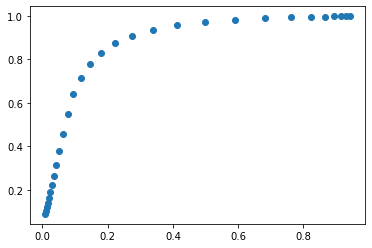

In [91]:
sigbg_ROC_plot(lin_reg, test)